**1.4.4	How can a machine learning model accurately predict an individual's stress level based on their technology usage patterns, sleep hours, and physical activity?**

In [ ]:
# prompt: upload excl file from gogle colan and print

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mental_health_and_technology_usage_2022.xlsx to mental_health_and_technology_usage_2022.xlsx
User uploaded file "mental_health_and_technology_usage_2022.xlsx" with length 913502 bytes


In [ ]:
import pandas as pd

# Replace the file path with the actual path of your Excel file
file_path = 'mental_health_and_technology_usage_2022.xlsx'

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
      User_ID  Age  Birth Year Generation  Technology_Usage_Hours  \
0  USER-00001   23        1999      Gen Z                    6.57   
1  USER-00002   21        2001      Gen Z                    3.01   
2  USER-00003   51        1971      Gen X                    3.04   
3  USER-00004   25        1997      Gen Z                    3.84   
4  USER-00005   53        1969      Gen X                    1.20   

   Social_Media_Usage_Hours  Gaming_Hours  Screen_Time_Hours  \
0                      6.00          0.68              12.36   
1                      2.57          3.74               7.61   
2                      6.14          1.26               3.16   
3                      4.48          2.59              13.08   
4                      0.56          0.29              12.63   

  Mental_Health_Status Stress_Level  Sleep_Hours  Physical_Activity_Hours  \
0                 Good          Low         8.01                     6.71   
1                

Accuracy: 0.3435

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.35      0.35       669
           1       0.36      0.34      0.35       677
           2       0.33      0.33      0.33       654

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000


Feature Importance:
                     Feature  Importance
3         Screen_Time_Hours    0.169307
0    Technology_Usage_Hours    0.168485
1  Social_Media_Usage_Hours    0.167682
5   Physical_Activity_Hours    0.166941
2              Gaming_Hours    0.164428
4               Sleep_Hours    0.163157


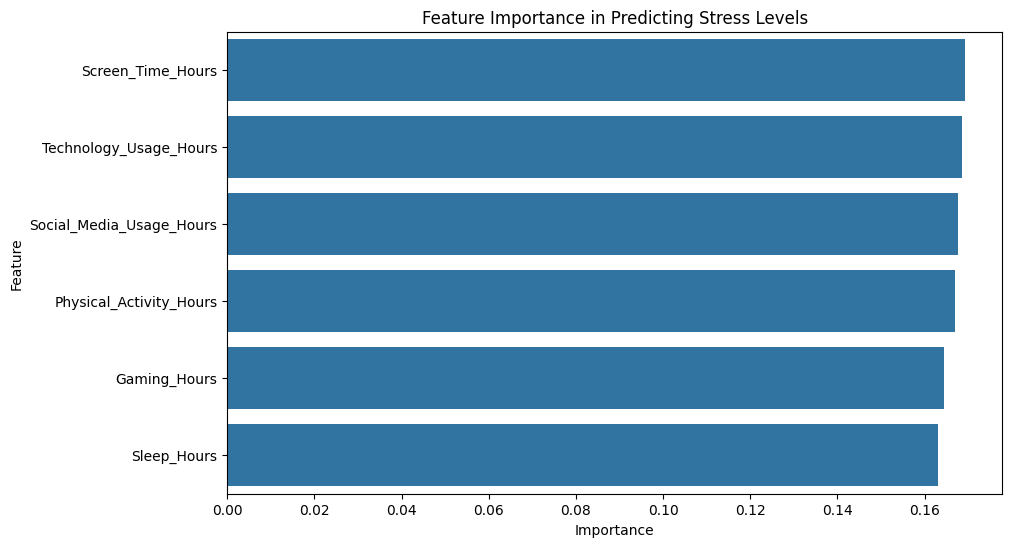

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = 'mental_health_and_technology_usage_2022.xlsx'
df = pd.read_excel(file_path)

# Step 2: Select relevant features for predicting stress levels
# We are using technology usage, sleep hours, and physical activity as features
features = ['Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours',
            'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours']

# The target variable is 'Stress_Level'
target = 'Stress_Level'

# Step 3: Convert categorical target variable (Stress_Level) to numeric values
# We map 'Low' to 0, 'Medium' to 1, and 'High' to 2, as Random Forest works with numeric targets
df[target] = df[target].map({'Low': 0, 'Medium': 1, 'High': 2})

# Step 4: Define X (features) and y (target)
X = df[features]
y = df[target]

# Step 5: Split the dataset into training and testing sets
# We are using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Step 6: Initialize the Random Forest model
# n_estimators=100 means the forest will have 100 trees. We set a random seed (random_state) for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=44)

# Step 7: Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Step 8: Use the trained model to predict stress levels on the test data
y_pred = rf_model.predict(X_test)

# Step 9: Evaluate the model's accuracy
# Accuracy score measures the proportion of correctly predicted instances
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 10: Generate and display the classification report
# The classification report gives precision, recall, and F1-score for each class (Low, Medium, High)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Analyze feature importance
# Feature importance shows which features contributed most to the predictions
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)

# Step 12: Visualize feature importance
# Plotting the feature importance for better understanding of what influences the model the most
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Stress Levels')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 13: Interpretation of results
# Feature importance helps us understand which factors are most influential in predicting stress
# Screen time, technology usage, and physical activity are the top contributors in this model

# You can further improve the model by tuning parameters or adding more relevant features.


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=44)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Display feature importance
importances_gb = gb_model.feature_importances_
feature_importance_gb_df = pd.DataFrame({'Feature': features, 'Importance': importances_gb})
feature_importance_gb_df = feature_importance_gb_df.sort_values(by='Importance', ascending=False)
print("\nGradient Boosting Feature Importance:\n", feature_importance_gb_df)


Gradient Boosting Model Accuracy: 0.353

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.31      0.33       669
           1       0.37      0.36      0.37       677
           2       0.34      0.39      0.37       654

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.35      0.35      2000


Gradient Boosting Feature Importance:
                     Feature  Importance
3         Screen_Time_Hours    0.206390
1  Social_Media_Usage_Hours    0.188072
2              Gaming_Hours    0.176097
0    Technology_Usage_Hours    0.159394
4               Sleep_Hours    0.137320
5   Physical_Activity_Hours    0.132726
